# Izpit iz vaj (7. 3. 2024)

### Tematika podatkov: Prometne nesreče

Priložene datoteke vsebujejo podatke o prometnih nesrečah. Poleg lokacije, resnosti in tipa nesreče so zabeležni še podatki o številu udeležencev, številu poškodb in žrtev, ter vremenske razmere v času nesreče. Namen tokratne inteligentne analize je napovedati stopnjo resnosti nesreče in število udeležnih ljudi v nesreči.

### Podatki

Podatki se nahajajo v štirih datotekah (`collision_properties.xlsx`, `collision_consequences.csv`,`weather_conditions.csv`, `severity_type.txt`). Prva datoteka vsebuje *splošne podatke o okoliščinah nesreče*, druga datoteka vsebuje *številske podatke o udežencih in poškodbah*, tretja *podatke o vremenskih razmerah* in zadnja *podatke o resnosti nesreče*.

#### V pomoč pri razumevanju posameznih spremenljivk so vam lahko naslednji opisi ter vrsta podatkov (številski/kategoričen/... podatek):
- Type - vrsta nesreče *kategoričen*
- Location - vrsta križišča, kjer je prišlo do nesreče *kategoričen*
- Distracted - ali je bil voznik, udeležen v nesreči, raztresen *kategoričen*
- Time - čas nesreče *časovni*
- People - število udeležnih ljudi *številski*
- Pedestrians - število udeležnih peščev *številski*
- Cyclists - število udeležnih kolesarjev *številski*
- Vehicles - število udeležnih vozil *številski*
- Injuries - število poškodb *številski*
- Fatalities - število žrtev v nesreči *številski*
- Weather - vreme v času nesreče *kategoričen*
- Road - razmere na cesti v času nesreče *kategoričen*
- Light - svetlobni pogoji v času nesreče *kategoričen*
- Wind - povprečna hitrost vetra na dan nesreče *številski*
- Temperature - povprečna temperatura na dan nesreče (v °F) *številski*
- Severity - resnost nesreče *kategoričen*

### Naloga 1 *(14 T)*

V dataframe preberite vse štiri datoteke s podatki: `collision_properties.xlsx`, `collision_consequences.csv`,`weather_conditions.csv` in `severity_type.txt`. Vse prebrane podatke iz datotek nato združite v en dataframe, glede na ID nesreče. Indeks stolpec naj bo poimenovan *collisionID*.

- Iz združenega dataframa **izbrišite** stolpec "time".
- Izpišite koliko **stolpcev in vrstic** je po brisnju v združenem datafram-u.
- Na **dva**(!) različna načina izpišite **prvih 5 vrstic** tega združenega datafram-a.
- Izpišite **opisno statistiko** za drugi, tretji in četrti številski stolpec (brez da bi v kodi navedli njihova imena)
- Izpišite koliko je posameznih **unikatnih vrednosti** v stolpcu "type" (npr. x 10, y 20 ...)
- Izpišite kakšna sta bila temperatura in vreme pri nesreči z ID-jem 43578.
- Izpišite število prometnih neseč, ki so imele več kot 1 smrtno žrtev.


In [2]:
import pandas as pd

df1=pd.read_csv("collision_consequences.csv", sep=",",index_col=0)
df2=pd.read_excel("collision_properties.xlsx",index_col=0)
df3=pd.read_csv("severity_type.txt",sep="	",index_col=0)
df4=pd.read_csv("weather_conditions.csv",sep=" ",index_col=0)
#print(df3)
data=pd.merge(df1,df2,left_index=True,right_index=True)
data=pd.merge(data,df3,left_index=True,right_index=True)
data=pd.merge(data,df4,left_index=True,right_index=True)

data.index.rename("collisionID")
print(data)

          severity  people  pedestrians  cyclists  vehicles  injuries  \
1            Minor       2            0         0       2.0         0   
2            Minor       3            0         0       3.0         0   
3      Significant       2            0         0       2.0         1   
4      Significant       2            0         0       2.0         1   
5            Minor       2            0         0       2.0         0   
...            ...     ...          ...       ...       ...       ...   
49996  Significant       3            0         0       2.0         2   
49997        Minor       2            0         0       2.0         0   
49998        Minor       2            0         0       2.0         0   
49999  Significant       2            1         0       1.0         1   
50000  Significant       3            1         0       1.0         1   

       fatalities        type           location distracted   time   weather  \
1               0  Parked Car          Mid-

In [3]:
data.columns

Index(['severity', 'people', 'pedestrians', 'cyclists', 'vehicles', 'injuries',
       'fatalities', 'type', 'location', 'distracted', 'time', 'weather',
       'road', 'light', 'wind', 'temperature'],
      dtype='object')

In [4]:
data.drop("time",axis=1,inplace=True)

In [5]:
data.columns

Index(['severity', 'people', 'pedestrians', 'cyclists', 'vehicles', 'injuries',
       'fatalities', 'type', 'location', 'distracted', 'weather', 'road',
       'light', 'wind', 'temperature'],
      dtype='object')

In [6]:
data.shape

(50000, 15)

In [7]:
data.iloc[0:5]

,severity,people,pedestrians,cyclists,vehicles,injuries,fatalities,type,location,distracted,weather,road,light,wind,temperature
1,Minor,2,0,0,2.0,0,0,Parked Car,Mid-Block,yes,Overcast,Wet,mostly dark,"9,4","33,0"
2,Minor,3,0,0,3.0,0,0,Rear Ended,Mid-Block,no,Clear,Ice,mostly dark,"9,4","33,0"
3,Significant,2,0,0,2.0,1,0,Head On,At Intersection,no,Clear,Dry,bright,"9,4","33,0"
4,Significant,2,0,0,2.0,1,0,Rear Ended,At Intersection,no,Clear,Dry,bright,"9,4","33,0"
5,Minor,2,0,0,2.0,0,0,Left Turn,At Intersection,no,Clear,Wet,bright,"9,4","33,0"


In [8]:
data.head(5)

,severity,people,pedestrians,cyclists,vehicles,injuries,fatalities,type,location,distracted,weather,road,light,wind,temperature
1,Minor,2,0,0,2.0,0,0,Parked Car,Mid-Block,yes,Overcast,Wet,mostly dark,"9,4","33,0"
2,Minor,3,0,0,3.0,0,0,Rear Ended,Mid-Block,no,Clear,Ice,mostly dark,"9,4","33,0"
3,Significant,2,0,0,2.0,1,0,Head On,At Intersection,no,Clear,Dry,bright,"9,4","33,0"
4,Significant,2,0,0,2.0,1,0,Rear Ended,At Intersection,no,Clear,Dry,bright,"9,4","33,0"
5,Minor,2,0,0,2.0,0,0,Left Turn,At Intersection,no,Clear,Wet,bright,"9,4","33,0"


In [9]:
data.describe()

,people,pedestrians,cyclists,vehicles,injuries,fatalities
count,50000.000000,50000.000000,50000.00000,49980.000000,50000.000000,50000.000000
mean,2.740360,0.053740,0.03618,2.043557,0.466060,0.001640
std,1.303603,0.238774,0.18887,0.537070,0.785252,0.041921
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.00000,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.00000,2.000000,0.000000,0.000000
75%,3.000000,0.000000,0.00000,2.000000,1.000000,0.000000
max,43.000000,6.000000,2.00000,11.000000,11.000000,2.000000


In [10]:
data["type"].unique

<bound method Series.unique of 1        Parked Car
2        Rear Ended
3           Head On
4        Rear Ended
5         Left Turn
            ...    
49996    Rear Ended
49997    Rear Ended
49998        Angles
49999    Pedestrian
50000    Pedestrian
Name: type, Length: 50000, dtype: object>

In [11]:
data["type"].nunique()

9

 Izpišite kakšna sta bila temperatura in vreme pri nesreči z ID-jem 43578.
- Izpišite število prometnih neseč, ki so imele več kot 1 smrtno žrtev.

In [12]:
izbrana=data.loc[[43578]]
print(izbrana["weather"])
print(izbrana["temperature"])

43578    Clear
Name: weather, dtype: object
43578    44,0
Name: temperature, dtype: object


In [13]:
izbrana=data[data["fatalities"]>=1]
print(izbrana.sum())
print(izbrana.__len__)
print(izbrana.shape)
print("79 je blo takih")

severity       SevereSevereSevereSevereSevereSevereSevereSeve...
people                                                       226
pedestrians                                                   38
cyclists                                                       7
vehicles                                                   132.0
injuries                                                      51
fatalities                                                    82
type           PedestrianPedestrianSideswipeAnglesHead OnAngl...
location       Mid-BlockDriveway JunctionMid-BlockAt Intersec...
distracted     nonononononononononononononononoyesnononononon...
weather        ClearClearClearClearClearClearClearRainingRain...
road           DryDryDryDryDryDryDryWetWetDryDryDryWetWetDryD...
light          mostly darkbrightbrightbrightbrightbrightmostl...
wind           3,88,722,9110,5111,416,047,618,9511,184,78,289...
temperature    42,057,058,073,066,063,067,048,042,538,034,533...
dtype: object
<bound meth

In [40]:

print(izbrana.shape[0])
print(izbrana.shape[1])

79
15


### Naloga 2 *(20 T)*
- S pomočjo grafa ponazorite mediano, minimalno/maksimalno vrednost in drugo sorodno opisno statistiko za podatek o povprečni temperaturi na dan nesreče.
- Izrišite graf, ki bo ločeno (v ločenih podgrafih) prikazoval lokacijo nesreče glede na število v nesreči udeleženih vozil in ljudi. Nesreče naj bodo obarvane glede na resnost nesreče (`severity`).
- Pri tej točki upoštevajte samo prometne nesreče, v katerih je bil voznik, udeležen v nesreči, označen kot raztresen (`distracted`). Za te nesreče zapišite za vsak posamezen tip nesreče (`type`) najmanjšo povprečno hitrost vetra na tisti dan, urejeno padajoče.
- Koliko je takšnih nesreč, ki so vključevale kolesarje (`type`: *Cycles*) in so se zgodile na križišču ali sredi ulice (*Mid-Block* ali *At Intersection*)?
- Kakšno je povprečje temperatur (zaokroženo na eno decimalko) v dnevih, ko so se zgodile nesreče z največ smrtnimi izidi?

<Axes: >

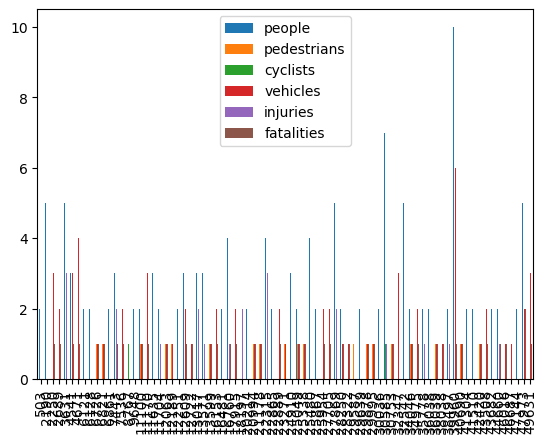

In [15]:
import seaborn as sns
izbrana.plot.bar()

In [16]:
avg_temp=izbrana["temperature"].mode()[0]
print(avg_temp)


41,0


In [17]:
distr=izbrana[izbrana["distracted"]=="yes"]

print(distr)

avg=(7.61+8.28+8.28+5.59+4.47)/5
print(f"povprecna hitrost vetra={avg}")

      severity  people  pedestrians  cyclists  vehicles  injuries  fatalities  \
11100   Severe       2            1         0       1.0         0           1   
13599   Severe       3            1         0       1.0         0           1   
29639   Severe       2            1         0       1.0         0           1   
29995   Severe       2            1         0       1.0         0           1   
38497   Severe       2            0         0       2.0         1           1   

             type           location distracted   weather road   light  wind  \
11100  Pedestrian    At Intersection        yes     Clear  Dry  bright  7,61   
13599  Pedestrian    At Intersection        yes  Overcast  Dry  bright  8,28   
29639  Pedestrian    At Intersection        yes     Clear  Dry  bright  8,28   
29995  Pedestrian    At Intersection        yes     Clear  Dry  bright  5,59   
38497      Angles  Driveway Junction        yes     Clear  Dry  bright  4,47   

      temperature  
11100       

Koliko je takšnih nesreč, ki so vključevale kolesarje (`type`: *Cycles*) in so se zgodile na križišču ali sredi ulice (*Mid-Block* ali *At Intersection*)?
- Kakšno je povprečje temperatur (zaokroženo na eno decimalko) v dnevih, ko so se zgodile nesreče z največ smrtnimi izidi?

In [1]:
kolesari=izbrana[izbrana["cyclists"]>=1]
print(kolesari)

print(kolesari[kolesari["location"]=="At Intersection"])
print("6 jih je blo na kriziscu in drugo zmankalo mi je casa da lepo napisem")


NameError: name 'izbrana' is not defined

### Naloga 3 *(7 T)*

- Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
- Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
    - svetlost (`light`) zapolnite z vrednostjo "mostly dark",
    - vreme (`weather`) zapolnite z najpogostejšo vrednostjo stolpca,
    - število udeleženih vozil (`vehicles`) zapolnite tako, da od stolpca `people` odštejete 1,
    - hitrost vetra (`wind`) in temperaturo (`temperature`) dopolnite s povprečno vrednostjo stolpca,
    - ostale vrstice z manjkajočimi vrednostmi izbrišite.

- Števila v stolpcu `vehicles` pretvorite v cele vrednosti (brez decimalk).
- Ponovno izpišite število manjkajočih vrednosti samo za tiste stolpce, ki so vsebovali manjkajoče vrednosti.

In [19]:
data.isna().sum()

severity        0
people          0
pedestrians     0
cyclists        0
vehicles       20
injuries        0
fatalities      0
type            0
location        0
distracted      5
weather        15
road            0
light          11
wind            9
temperature    26
dtype: int64

In [20]:
data["weather"].fillna(data["weather"].mode()[0],inplace=True)

In [21]:
data.isna().sum()

severity        0
people          0
pedestrians     0
cyclists        0
vehicles       20
injuries        0
fatalities      0
type            0
location        0
distracted      5
weather         0
road            0
light          11
wind            9
temperature    26
dtype: int64

In [22]:
data.columns

Index(['severity', 'people', 'pedestrians', 'cyclists', 'vehicles', 'injuries',
       'fatalities', 'type', 'location', 'distracted', 'weather', 'road',
       'light', 'wind', 'temperature'],
      dtype='object')

In [23]:
data["vehicles"].fillna(data["people"]-1,inplace=True)

In [24]:
data.isna().sum()

severity        0
people          0
pedestrians     0
cyclists        0
vehicles        0
injuries        0
fatalities      0
type            0
location        0
distracted      5
weather         0
road            0
light          11
wind            9
temperature    26
dtype: int64

hitrost vetra (`wind`) in temperaturo (`temperature`) dopolnite s povprečno vrednostjo stolpca,
    - ostale vrstice z manjkajočimi vrednostmi izbrišite.

- Števila v stolpcu `vehicles` pretvorite v cele vrednosti (brez decimalk).
- Ponovno izpišite število manjkajočih vrednosti samo za tiste stolpce, ki so vsebovali manjkajoče vrednosti.

In [25]:
data.describe

<bound method NDFrame.describe of           severity  people  pedestrians  cyclists  vehicles  injuries  \
1            Minor       2            0         0       2.0         0   
2            Minor       3            0         0       3.0         0   
3      Significant       2            0         0       2.0         1   
4      Significant       2            0         0       2.0         1   
5            Minor       2            0         0       2.0         0   
...            ...     ...          ...       ...       ...       ...   
49996  Significant       3            0         0       2.0         2   
49997        Minor       2            0         0       2.0         0   
49998        Minor       2            0         0       2.0         0   
49999  Significant       2            1         0       1.0         1   
50000  Significant       3            1         0       1.0         1   

       fatalities        type           location distracted   weather road  \
1          

In [26]:
data["wind"].fillna(data["wind"].mode()[0],inplace=True)

In [27]:
data.isna().sum()

severity        0
people          0
pedestrians     0
cyclists        0
vehicles        0
injuries        0
fatalities      0
type            0
location        0
distracted      5
weather         0
road            0
light          11
wind            0
temperature    26
dtype: int64

In [28]:
data["temperature"].fillna(data["temperature"].mode()[0],inplace=True)

In [29]:
data.dropna(inplace=True)

In [30]:
data.isna().sum()

severity       0
people         0
pedestrians    0
cyclists       0
vehicles       0
injuries       0
fatalities     0
type           0
location       0
distracted     0
weather        0
road           0
light          0
wind           0
temperature    0
dtype: int64

### Naloga 4 *(10 T)*

- Ustvarite dve kopiji datafram-a `dfRegresija` in `dfKlasifikacija`:
  - `dfKlasifikacija` je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali stopnjo resnosti nesreče (Severity).
  - `dfRegresija` je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali število udeležnih ljudi v nesreči (People).
- Podatke v obeh dataframih **ustrezno predprocesirajte(!)** - kategorične podatke s samo dvema različnima vrednostma pretvorite z LabelEncoderjem, ostale kategorične pa v indikacijske vrednosti. Izbrane številske vrednosti morajo biti standardizirane.
- Izpišite prve štiri vrstice iz vsakega dataframa.

In [31]:
dfKlasifikacija=data.copy()
dfRegresija=data.copy()

dfKlasifikacija.drop("severity",axis=1,inplace=True)
dfRegresija.drop("people",axis=1,inplace=True)


In [32]:
data.dtypes

severity        object
people           int64
pedestrians      int64
cyclists         int64
vehicles       float64
injuries         int64
fatalities       int64
type            object
location        object
distracted      object
weather         object
road            object
light           object
wind            object
temperature     object
dtype: object

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
catcols=dfKlasifikacija.select_dtypes(include="object").columns
numcols=dfKlasifikacija.select_dtypes(include="int64").columns

preprocessing=ColumnTransformer([("cat",LabelEncoder(),catcols),("num",StandardScaler(),numcols)],remainder="passthrough")   
dfKlasifikacija=preprocessing.fit_transform(dfKlasifikacija)


TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
dataKlasifikacija = pd.DataFrame(copy_preprocessing.toarray(), columns=preprocessing.get_feature_names_out())


ValueError: Shape of passed values is (49984, 1), indices imply (49984, 244)

In [ ]:
data.describe

<bound method NDFrame.describe of           severity  people  pedestrians  cyclists  vehicles  injuries  \
1            Minor       2            0         0       2.0         0   
2            Minor       3            0         0       3.0         0   
3      Significant       2            0         0       2.0         1   
4      Significant       2            0         0       2.0         1   
5            Minor       2            0         0       2.0         0   
...            ...     ...          ...       ...       ...       ...   
49996  Significant       3            0         0       2.0         2   
49997        Minor       2            0         0       2.0         0   
49998        Minor       2            0         0       2.0         0   
49999  Significant       2            1         0       1.0         1   
50000  Significant       3            1         0       1.0         1   

       fatalities        type           location distracted   weather road  \
1          

In [ ]:
data.dtypes

severity        object
people           int64
pedestrians      int64
cyclists         int64
vehicles       float64
injuries         int64
fatalities       int64
type            object
location        object
distracted      object
weather         object
road            object
light           object
wind            object
temperature     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dfKlasifikacija.drop(catcols,axis=1,inplace=True)
dfRegresija.drop(catcols,axis=1,inplace=True)

### Naloga 5 *(15 T)*

S pomočjo regresija poskusite napovedati število udeležnih ljudi v nesreči (`people`). Za podatke uporabite predprocesiran dataframe `dfRegresija`. Podatke razdelite na učne in testne s pomočjo delitve na 3 folde. Za regresor uporabite linearno regresijo, XGBoost in regresijski naključni gozd ter jo izvedite s pomočjo navzkrižne validacije.

- Kako dobro se je naučil model ocenite s **povprečno absolutno napako** (izpisana mora bit pozitivna vrednost) in **r2 score**. Oboje zaokrožite na dve decimalki in prikažite v obliki **grafa**.

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
najboljsi=0
x=dfRegresija.copy()
y=data["people"]

modeli = {"Lin Reg": LinearRegression(),
          "Grad boost":GradientBoostingRegressor(),
          "Rand forest":RandomForestRegressor()}

rezultati={}
cv = StratifiedKFold(n_splits=6)



X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_lr=r2_score(y_train, y_pred)
mse_lr=np.positive(mean_squared_error(y_train,y_pred)*(-1))
print(r2_lr)
print(mse_lr)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
r2_gb=r2_score(y_train, y_pred)
mse_gb=np.positive(mean_squared_error(y_train,y_pred)*(-1))

print(r2_gb)
print(mse_gb)

rf=RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_rf=r2_score(y_train, y_pred)
mse_rf=np.positive(mean_squared_error(y_train,y_pred))
print(r2_gb)
print(mse_rf)

if mse_rf<mse_gb and mse_rf<mse_lr:
    najboljsi=RandomForestRegressor()
elif mse_gb<mse_rf and mse_gb<mse_lr:
    najboljsi=GradientBoostingRegressor()
else:
    najboljsi=LinearRegression()





### Naloga 6 *(10 T)*
Glede na rezultate iz prejšnje naloge izberite regresor, ki je dal najboljše rezultate in njegovo delovanje poskušajte še optimizirati. Za iskanje najboljših nastavitev parametrov uporabite naključno iskanje (RandomizedSearchCV), ki ga omejite na 15 iteracij. Poiščite najboljše nastavitve za **tri poljubne parametre**, za vsak parameter pa mu dajte na vojo vsaj **dve različni vrednosti**, med katerimi naj izbira. En izmed teh parametrov mora biti obvezno številski. Število foldov, vhodni in izhodni podatki naj bodo enaki kot pri 5. nalogi.

Izpišite **najboljše nastavitve parametrov** in **najboljšo doseženo (pozitivno) MAE vrednost**.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_distr = {"n_jobs": [1, 5, 10, 25, 50],
               "min_samples_leaf":[1, 5, 10, 25, 50],
               "max_depth":[1, 5, 10, 25, 50]
               #"max_features":[None,sqrt, l]
               }
rand_search = RandomizedSearchCV(estimator=najboljsi,
param_distributions=param_distr,
n_iter=15,
cv=StratifiedKFold(n_splits=6),
scoring="accuracy",
random_state=42)

rand_search.fit(x, y)
print('Best score:', rand_search.best_score_)
print('Best parameters:', rand_search.best_params_)

### Naloga 7 *(10 T)*

S pomočjo klasifikacije poskusite napovedati stopnjo resnosti nesreče (Severity), za podatke pa uporabite dataframe `dfKlasifikacija`. Iz vhodnih podatkov izpustite tudi podatek o številu poškodaovanih in ranjenih. Za testiranje uporabite eno petino vseh podatkov. Naključno stanje naj bo 617. Za klasifikator uporabite odločitveno drevo in naključni gozd.

- Kako dobro se je naučil model ocenite z globalnim **priklicem (recall)**.
- Izpišite tabelo, ki bo vsebovala tri stolpce - prvi naj vsebuje dejansko vrednost, drugi napoved prvega klasifikatorja, tretji napoved drugega klasifikatorja. Tabela naj prikazuje prvih 5 testnih instanc (prometnih nesreč).

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
x=dfKlasifikacija.copy()
y=data["severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=, random_state=)

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rec=recall_score(y_test, y_pred, average=None)
print(rec)
print(y_pred, y_test)

### Naloga 8 *(9 T)*

Za konec naredite še gručenje nad enakim datasetom, kot ste ga uporabili za regresijo. Podatke transformirajte s pomočjo FastICA dekompozicije. Kot algoritem gručenja uporabite KMeans.

- Da boste vedeli koliko je najbolj optimalno število gruč na katere je smiselno deliti podatke pred gručenjem izrišite **graf z izračunanimi inerciami** za od 1 do (vključno) 6 gruč, nad transformiranimi podatki. Po pravilu komolca iz grafa preberite najbolj optimalno število gruč in ga uporabite v algoritmu.

- Izrišite **graf**, v katerem prikažete **transformirane podatke**, ki so obarvani glede na **gručo**, v katero so razvrščeni.

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import seaborn as sns

#pravilo komolca tam ko je najvecji prelom da vem da ne recem stevila grucc naprej delat
x=dataRegresija.copy
transformer = FastICA(n_components=7,
        random_state=0,
        whiten='unit-variance')
X_transformed = transformer.fit_transform(x)
X_transformed.shape

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)
kmeans.labels_

sns.lineplot(data=kmeans, x=" ", y=" ")